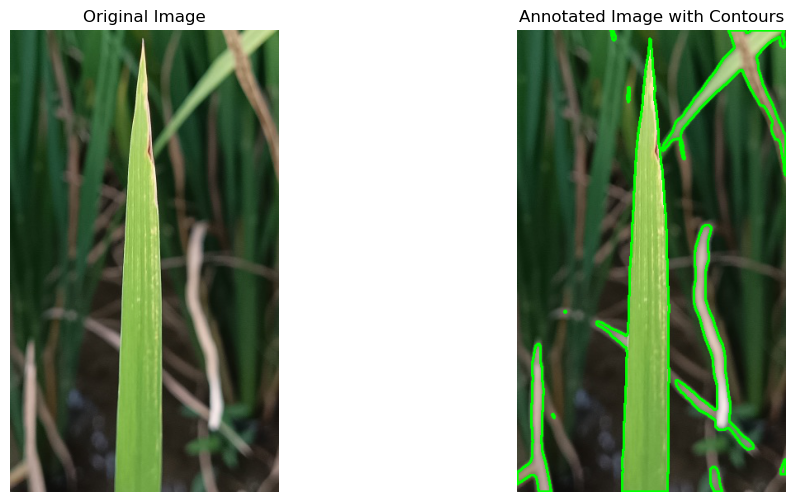

In [4]:


# Read the image
 # Replace with your image path
image = cv2.imread("Copy of stage_1_80.jpeg")
import cv2
import numpy as np
from matplotlib import pyplot as plt



# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve segmentation
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Otsu's thresholding method to binarize the image
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
annotated_image = image.copy()
cv2.drawContours(annotated_image, contours, -1, (0, 255, 0), 2)

# Display the original image and the annotated image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('Annotated Image with Contours')
plt.axis('off')

plt.show()


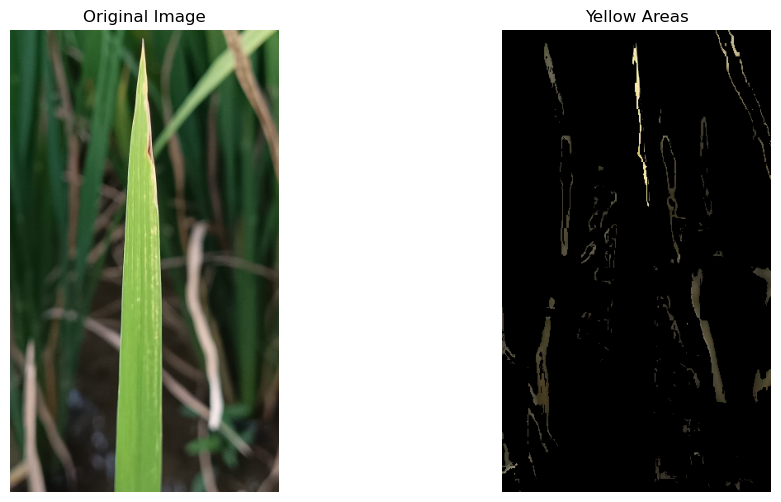

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
# Replace with your image path
image = cv2.imread("Copy of stage_1_80.jpeg")

# Convert the image to the HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range of yellow color in HSV
lower_yellow = np.array([20, 50, 50])
upper_yellow = np.array([30, 255, 255])

# Threshold the HSV image to get only yellow colors
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

# Bitwise AND mask and original image
yellow_areas = cv2.bitwise_and(image, image, mask=mask)

# Find contours in the binary image
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
annotated_image = image.copy()
cv2.drawContours(annotated_image, contours, -1, (0, 255, 0), 2)

# Display the original image, yellow areas, and the annotated image
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(yellow_areas, cv2.COLOR_BGR2RGB))
plt.title('Yellow Areas')
plt.axis('off')

plt.show()


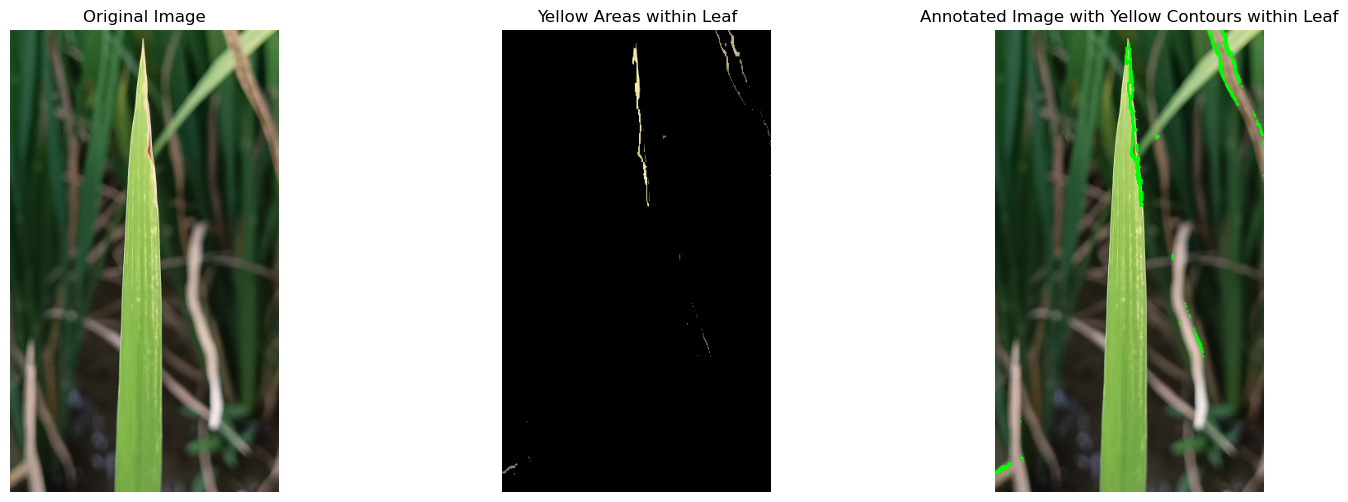

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread("Copy of stage_1_80.jpeg")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve segmentation
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Otsu's thresholding method to binarize the image
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize a mask for the leaf area
leaf_mask = np.zeros_like(gray)

# Draw contours on the leaf mask
cv2.drawContours(leaf_mask, contours, -1, (255), thickness=cv2.FILLED)

# Bitwise AND the original image with the leaf mask
leaf_image = cv2.bitwise_and(image, image, mask=leaf_mask)

# Convert the leaf image to the HSV color space
hsv = cv2.cvtColor(leaf_image, cv2.COLOR_BGR2HSV)

# Define the range of yellow color in HSV
lower_yellow = np.array([20, 50, 50])
upper_yellow = np.array([30, 255, 255])

# Threshold the HSV image to get only yellow colors within the leaf area
yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
yellow_areas = cv2.bitwise_and(leaf_image, leaf_image, mask=yellow_mask)

# Find contours in the yellow mask within the leaf area
yellow_contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
annotated_image = image.copy()
cv2.drawContours(annotated_image, yellow_contours, -1, (0, 255, 0), 2)

# Display the original image, yellow areas within the leaf area, and the annotated image
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(yellow_areas, cv2.COLOR_BGR2RGB))
plt.title('Yellow Areas within Leaf')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title('Annotated Image with Yellow Contours within Leaf')
plt.axis('off')

plt.show()
